In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

In [2]:
df = pd.read_csv('Data/Xeek_train_subset_clean.csv')

In [3]:
df.describe()

,DEPTH_MD,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC
count,133198.000000,133006.000000,125805.000000,108053.000000,133198.000000,91725.000000,100840.000000,132635.000000
mean,1792.944663,13.199399,1.743774,2.199556,69.553872,0.355602,4.511845,122.700286
std,739.441515,3.561386,13.233330,0.236902,39.328728,0.143857,5.092807,34.234879
min,415.261599,5.946157,0.123068,1.366913,0.109284,-0.023143,1.010027,7.415132
25%,1182.822400,11.381848,0.777323,2.029237,43.244637,0.234927,2.857540,87.899776
50%,1747.524495,12.698571,1.130621,2.162121,66.266132,0.382014,3.780121,135.968094
75%,2413.874901,14.944049,1.644573,2.404375,93.808681,0.480985,5.098502,147.388626
max,3272.024000,25.717396,1856.935059,3.115611,804.298950,0.817310,365.575592,230.432953


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133198 entries, 0 to 133197
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   WELL       133198 non-null  object 
 1   DEPTH_MD   133198 non-null  float64
 2   FORMATION  111632 non-null  object 
 3   CALI       133006 non-null  float64
 4   RDEP       125805 non-null  float64
 5   RHOB       108053 non-null  float64
 6   GR         133198 non-null  float64
 7   NPHI       91725 non-null   float64
 8   PEF        100840 non-null  float64
 9   DTC        132635 non-null  float64
 10  LITH       133198 non-null  object 
dtypes: float64(8), object(3)
memory usage: 11.2+ MB


In [5]:
df['LITH'].nunique()

11

In [6]:
df['LITH'].unique()

array(['Shale', 'Sandstone', 'Sandstone/Shale', 'Limestone', 'Tuff',
       'Marl', 'Anhydrite', 'Dolomite', 'Chalk', 'Coal', 'Halite'],
      dtype=object)

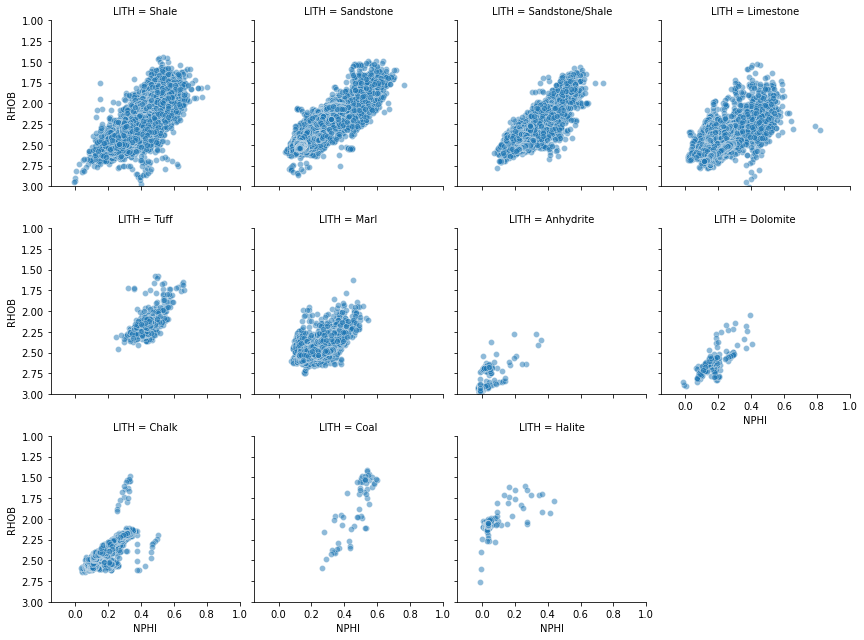

In [7]:
g = sns.FacetGrid(df, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))

<AxesSubplot:>

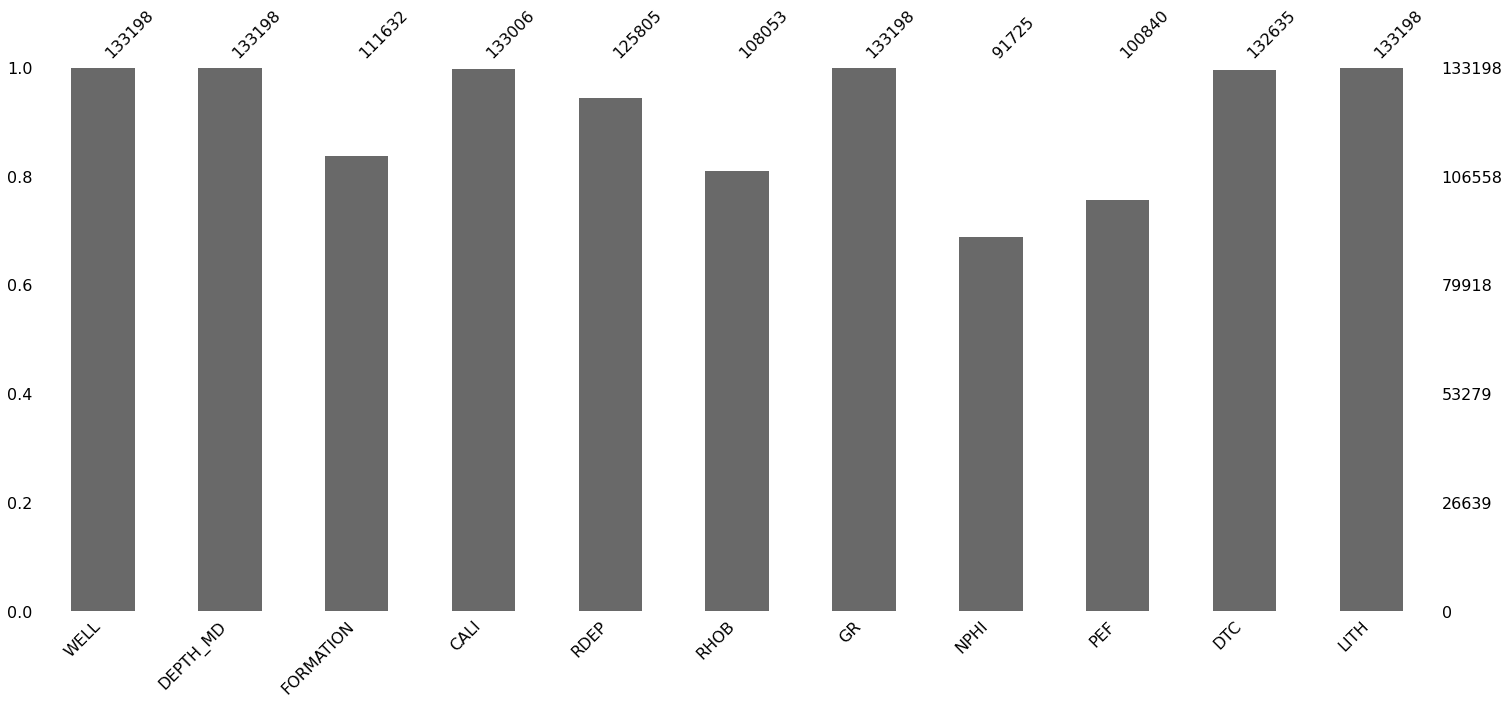

In [8]:
mno.bar(df)

In [9]:
df.dropna(inplace=True)

<AxesSubplot:>

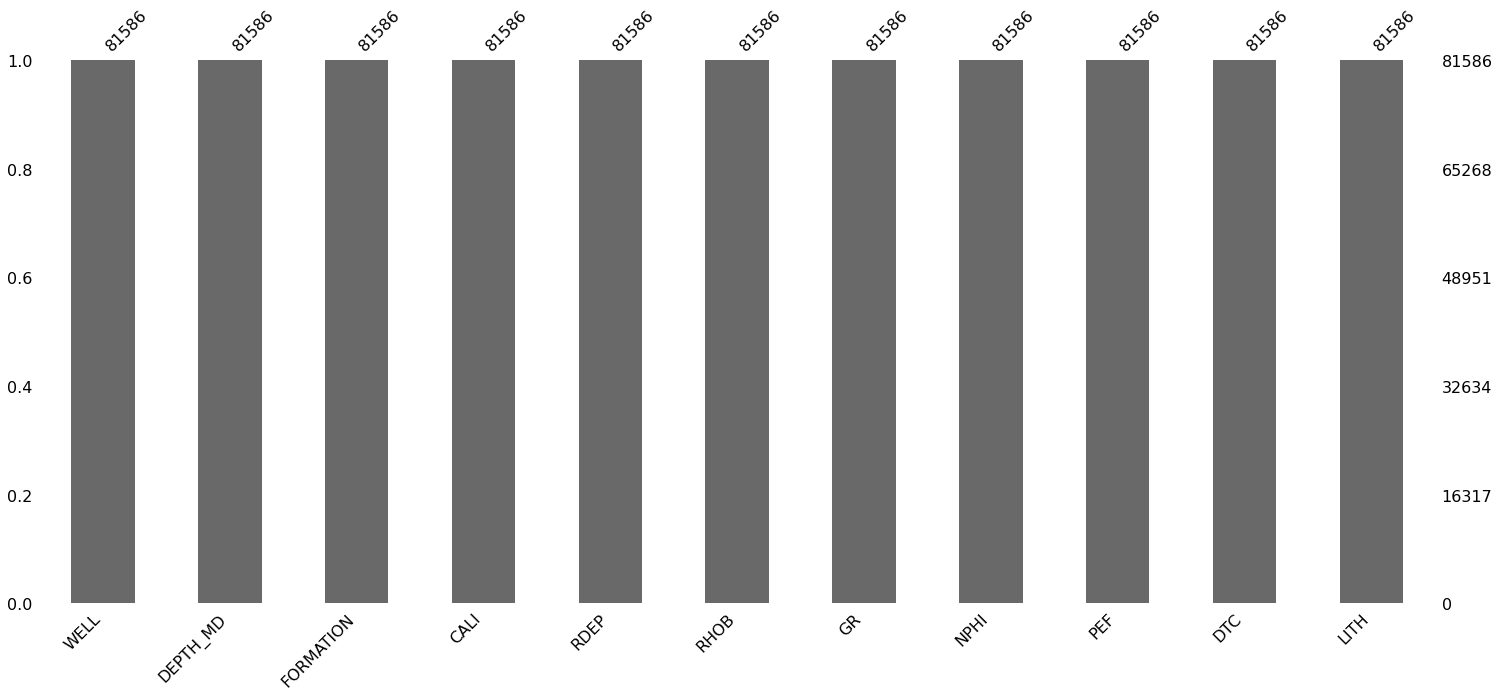

In [10]:
mno.bar(df)

In [11]:
df['LITH'].value_counts()

Shale              48705
Limestone          10973
Sandstone          10076
Sandstone/Shale     4578
Marl                3715
Chalk               2254
Tuff                1034
Dolomite              98
Anhydrite             75
Coal                  58
Halite                20
Name: LITH, dtype: int64

## Creating the Random Forest Model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


In [13]:
X = df[['RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC']]
y = df['LITH']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
clf=RandomForestClassifier(n_estimators=100)

In [17]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
y_pred=clf.predict(X_test)

In [19]:
accuracy=metrics.accuracy_score(y_test, y_pred)

In [20]:
accuracy

0.91203628043798

In [21]:
clf_rpt = classification_report(y_test, y_pred)
print(clf_rpt)

                 precision    recall  f1-score   support

      Anhydrite       1.00      0.96      0.98        25
          Chalk       0.86      0.74      0.80       686
           Coal       0.75      0.50      0.60        12
       Dolomite       0.67      0.47      0.55        30
         Halite       0.80      0.80      0.80         5
      Limestone       0.89      0.87      0.88      3214
           Marl       0.85      0.77      0.81      1124
      Sandstone       0.89      0.88      0.89      3059
Sandstone/Shale       0.79      0.64      0.70      1358
          Shale       0.94      0.98      0.96     14632
           Tuff       0.82      0.53      0.65       331

       accuracy                           0.91     24476
      macro avg       0.84      0.74      0.78     24476
   weighted avg       0.91      0.91      0.91     24476



In [22]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[   24,     0,     0,     0,     0,     0,     0,     0,     0,
            1,     0],
       [    0,   511,     0,     0,     0,   160,     1,    11,     3,
            0,     0],
       [    0,     0,     6,     0,     0,     0,     0,     0,     0,
            6,     0],
       [    0,     0,     0,    14,     0,     4,     1,     4,     4,
            3,     0],
       [    0,     0,     0,     0,     4,     0,     0,     0,     0,
            1,     0],
       [    0,    70,     0,     4,     0,  2793,    75,    31,    16,
          221,     4],
       [    0,    11,     0,     0,     0,   115,   871,     4,    15,
          106,     2],
       [    0,     0,     2,     0,     0,    30,    18,  2704,   100,
          198,     7],
       [    0,     1,     0,     1,     0,    14,    24,   166,   863,
          289,     0],
       [    0,     0,     0,     2,     1,    32,    31,    88,    96,
        14356,    26],
       [    0,     0,     0,     0,     0,     3,     2,    

In [23]:
labels = ['Shale', 'Sandstone', 'Sandstone/Shale', 'Limestone', 'Tuff',
       'Marl', 'Anhydrite', 'Dolomite', 'Chalk', 'Coal', 'Halite']
labels.sort()

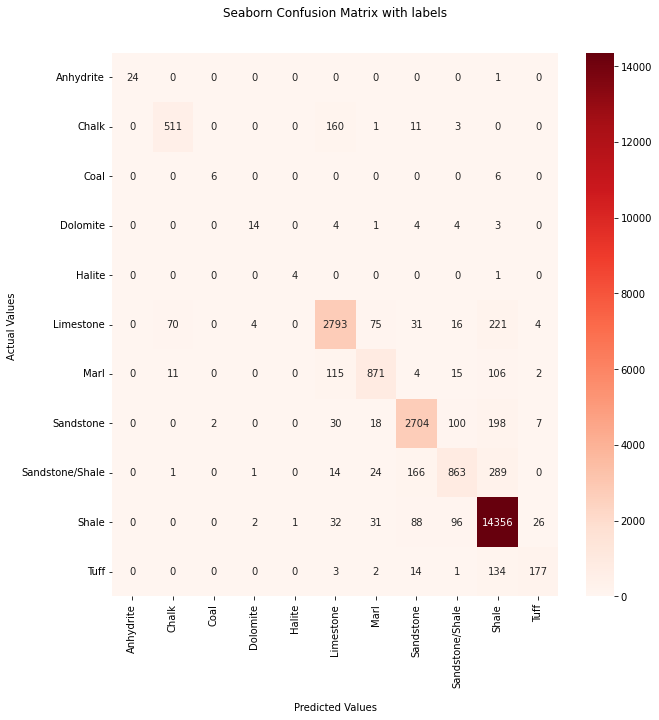

In [24]:
import seaborn as sns

fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds', fmt='.0f',
                xticklabels=labels, 
                yticklabels = labels)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


## TW

In [46]:
test_well_x = df_test_well[['RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC']]
test_well_y = df_test_well['LITH']

test_well_pred = clf.predict(test_well_x)

In [34]:
accuracy_tw=metrics.accuracy_score(test_well_y, test_well_pred)
accuracy_tw

0.7730184147317855

In [35]:
clf_rpt_tw = classification_report(test_well_y, test_well_pred)
print(clf_rpt_tw)

                 precision    recall  f1-score   support

          Chalk       0.00      0.00      0.00         0
      Limestone       0.86      0.65      0.74       532
           Marl       0.14      0.19      0.16       147
      Sandstone       0.87      0.98      0.92       473
Sandstone/Shale       0.22      0.07      0.10       151
          Shale       0.85      0.91      0.88      1195

       accuracy                           0.77      2498
      macro avg       0.49      0.47      0.47      2498
   weighted avg       0.78      0.77      0.77      2498



/Users/andy/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andy/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andy/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
cf_matrix_tw = confusion_matrix(test_well_y, test_well_pred)
cf_matrix_tw

array([[   0,    0,    0,    0,    0,    0],
       [  44,  347,  121,    5,    4,   11],
       [   0,   13,   28,   15,   12,   79],
       [   0,    9,    0,  463,    1,    0],
       [   0,    4,    0,   43,   10,   94],
       [   0,   32,   52,    9,   19, 1083]])

In [45]:
df_test_well.LITH.value_counts()

Shale              1195
Limestone           532
Sandstone           473
Sandstone/Shale     151
Marl                147
Name: LITH, dtype: int64

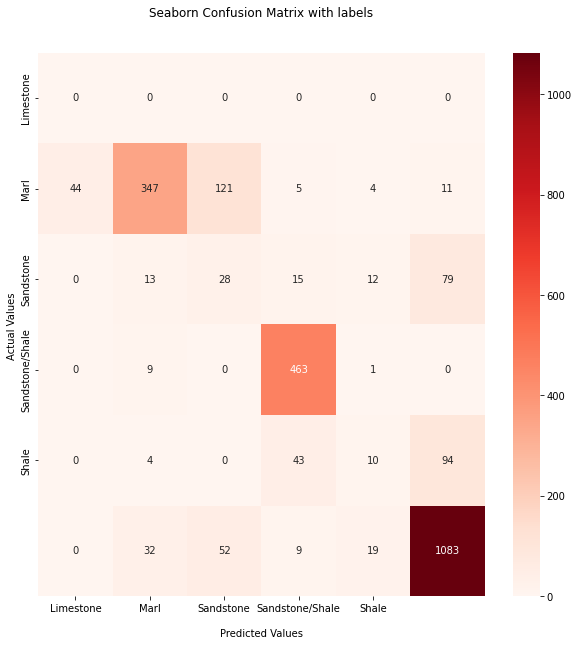

In [40]:
labels = ['Limestone', 'Shale', 'Marl', 'Sandstone/Shale', 'Sandstone']
labels.sort()

fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cf_matrix_tw, annot=True, cmap='Reds', fmt='.0f',
                xticklabels=labels, 
                yticklabels = labels)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

